In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from basketball_reference_web_scraper import client
import numpy as np
import requests
%matplotlib inline

In [3]:
from nba_api.stats.static import teams
from nba_api.stats.endpoints import teamyearbyyearstats, leaguestandings, leaguegamefinder
from nba_api.stats.library.parameters import Season, SeasonType

In [4]:
nba_teams = teams.get_teams()
team_dict = {}
abbrevs = {}
for team in nba_teams:
    name = team['nickname'].split()[-1].upper()
    if name == '76ERS':
        name = 'SIXERS'

    team_dict[name] = team['id']
    abbrevs[team['abbreviation']] = name
team_dict

{'HAWKS': 1610612737,
 'CELTICS': 1610612738,
 'CAVALIERS': 1610612739,
 'PELICANS': 1610612740,
 'BULLS': 1610612741,
 'MAVERICKS': 1610612742,
 'NUGGETS': 1610612743,
 'WARRIORS': 1610612744,
 'ROCKETS': 1610612745,
 'CLIPPERS': 1610612746,
 'LAKERS': 1610612747,
 'HEAT': 1610612748,
 'BUCKS': 1610612749,
 'TIMBERWOLVES': 1610612750,
 'NETS': 1610612751,
 'KNICKS': 1610612752,
 'MAGIC': 1610612753,
 'PACERS': 1610612754,
 'SIXERS': 1610612755,
 'SUNS': 1610612756,
 'BLAZERS': 1610612757,
 'KINGS': 1610612758,
 'SPURS': 1610612759,
 'THUNDER': 1610612760,
 'RAPTORS': 1610612761,
 'JAZZ': 1610612762,
 'GRIZZLIES': 1610612763,
 'WIZARDS': 1610612764,
 'PISTONS': 1610612765,
 'HORNETS': 1610612766}

In [81]:
final_df = pd.DataFrame()
years = ['1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04','2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17',
       '2017-18', '2018-19', '2019-20']
for team in team_dict.keys():
    
    nbateam = teamyearbyyearstats.TeamYearByYearStats(team_id=team_dict[team]).get_dict()
    df = pd.DataFrame(nbateam['resultSets'][0]['rowSet'], columns = nbateam['resultSets'][0]['headers'])
    df = df.set_index(["YEAR", "TEAM_ID"])["1997-98":]
    final_df = final_df.append(df)
final_df

,,TEAM_CITY,TEAM_NAME,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,PO_WINS,PO_LOSSES,...,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK
YEAR,TEAM_ID,,,,,,,,,,,,,,,,,,,,,
1997-98,1610612737,Atlanta,Hawks,82,50,32,0.610,5,4,1,3,...,1106,2417,3523,1569,1671,653,1214,491,7860,15
1998-99,1610612737,Atlanta,Hawks,50,31,19,0.620,4,2,3,6,...,676,1499,2175,782,987,346,745,260,4315,28
1999-00,1610612737,Atlanta,Hawks,82,28,54,0.341,14,7,0,0,...,1146,2570,3716,1548,1718,500,1266,461,7735,25
2000-01,1610612737,Atlanta,Hawks,82,25,57,0.305,13,7,0,0,...,1028,2490,3518,1559,1863,634,1368,387,7459,26
2001-02,1610612737,Atlanta,Hawks,82,33,49,0.402,12,6,0,0,...,955,2445,3400,1656,1702,667,1275,350,7711,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-16,1610612766,Charlotte,Hornets,82,48,34,0.585,6,3,3,4,...,734,2869,3603,1778,1487,595,1029,438,8479,11
2016-17,1610612766,Charlotte,Hornets,82,36,46,0.439,11,4,0,0,...,721,2853,3574,1891,1360,571,942,390,8601,16
2017-18,1610612766,Charlotte,Hornets,82,36,46,0.439,10,3,0,0,...,827,2901,3728,1770,1409,559,1041,373,8874,10


In [82]:
years

['1997-98',
 '1998-99',
 '1999-00',
 '2000-01',
 '2001-02',
 '2002-03',
 '2003-04',
 '2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',
 '2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17',
 '2017-18',
 '2018-19',
 '2019-20']

In [83]:
standing_df = pd.DataFrame()
for year in years:
    stan = leaguestandings.LeagueStandings(season=year).get_dict()
    stan_df = pd.DataFrame(stan['resultSets'][0]['rowSet'], columns=stan['resultSets'][0]['headers'])
    stan_df['YEAR'] = year
    stan_df = stan_df.set_index(["YEAR", "TeamID"])
    standing_df = standing_df.append(stan_df)
standing_df

LeagueID SeasonID      TeamCity      TeamName Conference  \
YEAR    TeamID                                                                
1997-98 1610612762       00    21997          Utah          Jazz       West   
        1610612741       00    21997       Chicago         Bulls       East   
        1610612760       00    21997       Seattle   SuperSonics       West   
        1610612748       00    21997         Miami          Heat       East   
        1610612747       00    21997   Los Angeles        Lakers       West   
...                     ...      ...           ...           ...        ...   
2019-20 1610612740       00    22019   New Orleans      Pelicans       West   
        1610612750       00    22019     Minnesota  Timberwolves       West   
        1610612737       00    22019       Atlanta         Hawks       East   
        1610612744       00    22019  Golden State      Warriors       West   
        1610612739       00    22019     Cleveland     Cavaliers       East   

                   ConferenceRecord  PlayoffRank ClinchIndicator   Division  \
YEAR    TeamID                                                                
1997-98 1610612762            38-14            1                    Midwest   
        1610612741            42-12            1                    Central   
        1610612760            39-13            2                    Pacific   
        1610612748            36-18            2                   Atlantic   
        1610612747            42-10            2                    Pacific   
...                             ...          ...             ...        ...   
2019-20 1610612740            18-30           13             - o  Southwest   
        1610612750            9-30            14             - o  Northwest   
        1610612737            11-32           14             - o  Southeast   
        1610612744            9-34            15             - o    Pacific   
        1610612739            12-32           15             - o    Central   

                   DivisionRecord  ...   Aug   Sep   Oct   Nov   Dec  PreAS  \
YEAR    TeamID                     ...                                        
1997-98 1610612762           22-2  ...  None  None  None  None  None  31-15   
        1610612741           21-7  ...  None  None  None  None  None  34-15   
        1610612760           19-5  ...  None  None  None  None  None  37-10   
        1610612748           18-6  ...  None  None  None  None  None  30-17   
        1610612747           16-8  ...  None  None  None  None  None  34-11   
...                           ...  ...   ...   ...   ...   ...   ...    ...   
2019-20 1610612740          4-9    ...   2-5  None   1-4   5-9  5-10  23-32   
        1610612750          2-10   ...  None  None   3-1   7-7  2-12  16-37   
        1610612737          6-7    ...  None  None   2-3  2-13  3-11  15-41   
        1610612744          2-11   ...  None  None   1-3  3-13  5-10  12-43   
        1610612739          4-10   ...  None  None   2-2  3-12   5-9  14-40   

                   PostAS vsSoutheast vsNorthwest vsSouthwest  
YEAR    TeamID                                                 
1997-98 1610612762   31-5         NaN         NaN         NaN  
        1610612741   28-5         NaN         NaN         NaN  
        1610612760  24-11         NaN         NaN         NaN  
        1610612748  25-10         NaN         NaN         NaN  
        1610612747  27-10         NaN         NaN         NaN  
...                   ...         ...         ...         ...  
2019-20 1610612740   7-10         3-3         9-9         4-9  
        1610612750    3-8         5-5        2-10        3-12  
        1610612737    5-6         6-7         3-5         3-5  
        1610612744    3-7         2-7        3-12        4-11  
        1610612739    5-6         6-8         4-4         3-6  

[683 rows x 81 columns]

In [84]:
final_df.columns

Index(['TEAM_CITY', 'TEAM_NAME', 'GP', 'WINS', 'LOSSES', 'WIN_PCT',
       'CONF_RANK', 'DIV_RANK', 'PO_WINS', 'PO_LOSSES', 'CONF_COUNT',
       'DIV_COUNT', 'NBA_FINALS_APPEARANCE', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'PF', 'STL', 'TOV', 'BLK', 'PTS', 'PTS_RANK'],
      dtype='object')

In [85]:
standing_df.columns

Index(['LeagueID', 'SeasonID', 'TeamCity', 'TeamName', 'Conference',
       'ConferenceRecord', 'PlayoffRank', 'ClinchIndicator', 'Division',
       'DivisionRecord', 'DivisionRank', 'WINS', 'LOSSES', 'WinPCT',
       'LeagueRank', 'Record', 'HOME', 'ROAD', 'L10', 'Last10Home',
       'Last10Road', 'OT', 'ThreePTSOrLess', 'TenPTSOrMore', 'LongHomeStreak',
       'strLongHomeStreak', 'LongRoadStreak', 'strLongRoadStreak',
       'LongWinStreak', 'LongLossStreak', 'CurrentHomeStreak',
       'strCurrentHomeStreak', 'CurrentRoadStreak', 'strCurrentRoadStreak',
       'CurrentStreak', 'strCurrentStreak', 'ConferenceGamesBack',
       'DivisionGamesBack', 'ClinchedConferenceTitle', 'ClinchedDivisionTitle',
       'ClinchedPlayoffBirth', 'EliminatedConference', 'EliminatedDivision',
       'AheadAtHalf', 'BehindAtHalf', 'TiedAtHalf', 'AheadAtThird',
       'BehindAtThird', 'TiedAtThird', 'Score100PTS', 'OppScore100PTS',
       'OppOver500', 'LeadInFGPCT', 'LeadInReb', 'FewerTurnovers', 'Poin

In [86]:
for i in final_df.index:
    print(i)

('1997-98', 1610612737)
('1998-99', 1610612737)
('1999-00', 1610612737)
('2000-01', 1610612737)
('2001-02', 1610612737)
('2002-03', 1610612737)
('2003-04', 1610612737)
('2004-05', 1610612737)
('2005-06', 1610612737)
('2006-07', 1610612737)
('2007-08', 1610612737)
('2008-09', 1610612737)
('2009-10', 1610612737)
('2010-11', 1610612737)
('2011-12', 1610612737)
('2012-13', 1610612737)
('2013-14', 1610612737)
('2014-15', 1610612737)
('2015-16', 1610612737)
('2016-17', 1610612737)
('2017-18', 1610612737)
('2018-19', 1610612737)
('2019-20', 1610612737)
('1997-98', 1610612738)
('1998-99', 1610612738)
('1999-00', 1610612738)
('2000-01', 1610612738)
('2001-02', 1610612738)
('2002-03', 1610612738)
('2003-04', 1610612738)
('2004-05', 1610612738)
('2005-06', 1610612738)
('2006-07', 1610612738)
('2007-08', 1610612738)
('2008-09', 1610612738)
('2009-10', 1610612738)
('2010-11', 1610612738)
('2011-12', 1610612738)
('2012-13', 1610612738)
('2013-14', 1610612738)
('2014-15', 1610612738)
('2015-16', 1610

In [110]:
steals_pg = []
win_pct = []
oppg = []
ppg = []
apg = []
rpg = []
fgpct = []
threepct = []

for team in final_df.index:
    steals_pg.append((final_df.loc[team, 'STL'])/(final_df.loc[team, 'GP']))
    win_pct.append(standing_df.loc[team, 'WinPCT'])
    oppg.append(standing_df.loc[team, 'OppPointsPG'])
    ppg.append(standing_df.loc[team, 'PointsPG'])
    apg.append((final_df.loc[team, 'AST'])/(final_df.loc[team, 'GP']))
    rpg.append((final_df.loc[team, 'REB'])/(final_df.loc[team, 'GP']))
    fgpct.append(final_df.loc[team, 'FG_PCT'])
    threepct.append(final_df.loc[team, 'FG3_PCT'])

correlation coefficient: 0.12281729216745019


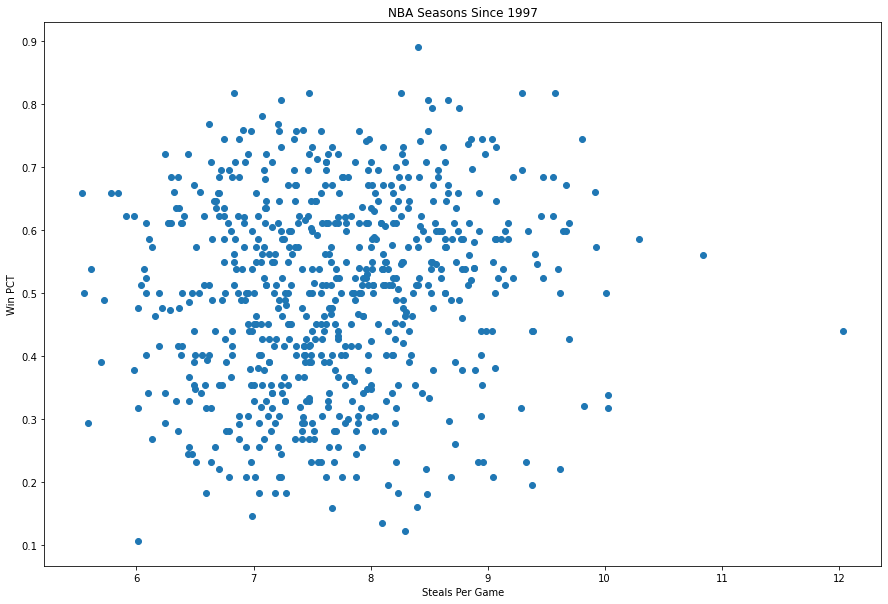

In [107]:
plt.rcParams['figure.figsize'] = [15, 10]
x = steals_pg
y = win_pct
r = np.corrcoef(x, y)
print("correlation coefficient: " + str(r[0,1]))
fig, ax = plt.subplots()
#ax.fmt_ydata = millions
plt.xlabel("Steals Per Game")
plt.ylabel("Win PCT")
plt.plot(x, y, 'o')
plt.title("NBA Seasons Since 1997")
plt.show()

correlation coefficient: -0.04211937985730209


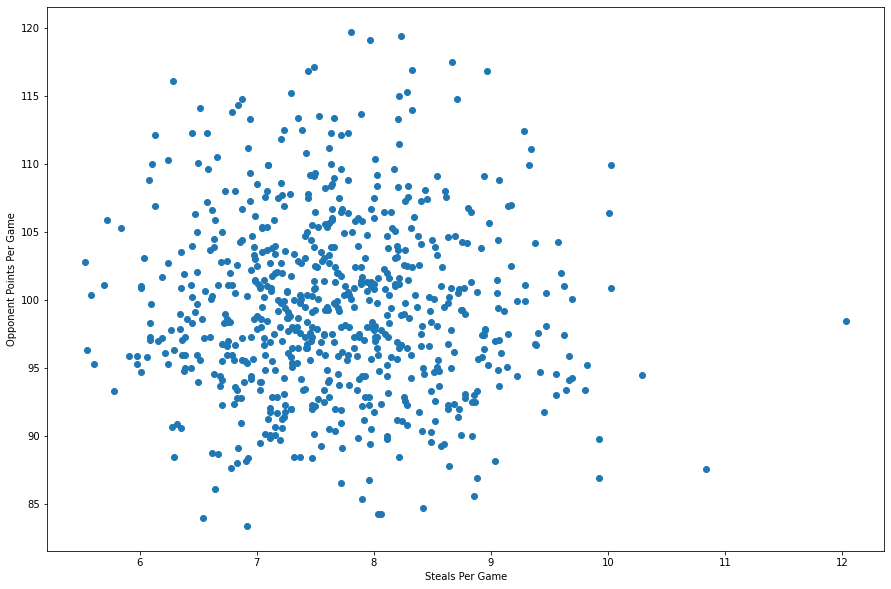

In [101]:
x = steals_pg
y = oppg
r = np.corrcoef(x, y)
print("correlation coefficient: " + str(r[0,1]))
fig, ax = plt.subplots()
#ax.fmt_ydata = millions
plt.xlabel("Steals Per Game")
plt.ylabel("Opponent Points Per Game")
plt.plot(x, y, 'o')
plt.title("NBA Seasons Since 1997")
plt.show()

correlation coefficient: 0.05443446444095796


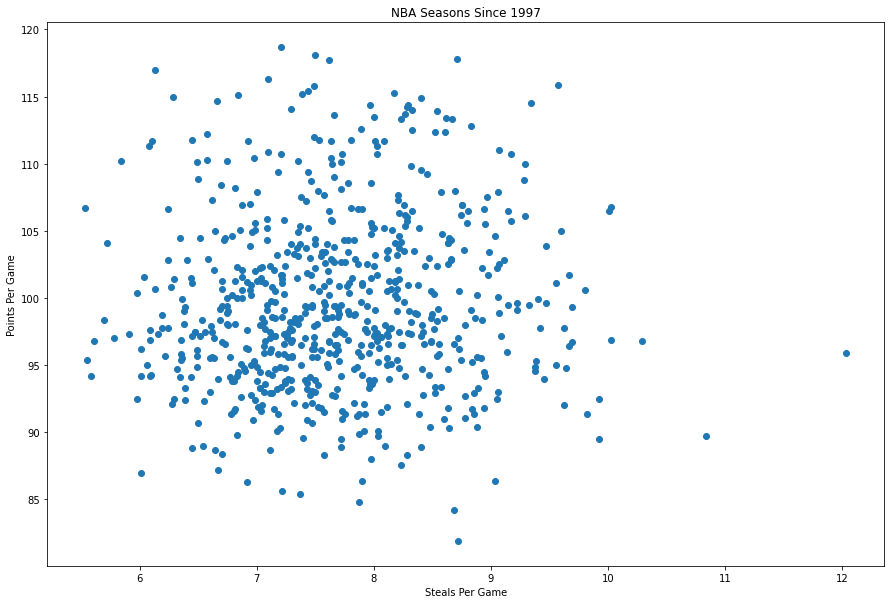

In [109]:
x = steals_pg
y = ppg
r = np.corrcoef(x, y)
print("correlation coefficient: " + str(r[0,1]))
fig, ax = plt.subplots()
#ax.fmt_ydata = millions
plt.xlabel("Steals Per Game")
plt.ylabel("Points Per Game")
plt.plot(x, y, 'o')
plt.title("NBA Seasons Since 1997")
plt.show()

correlation coefficient: 0.34987072203465075


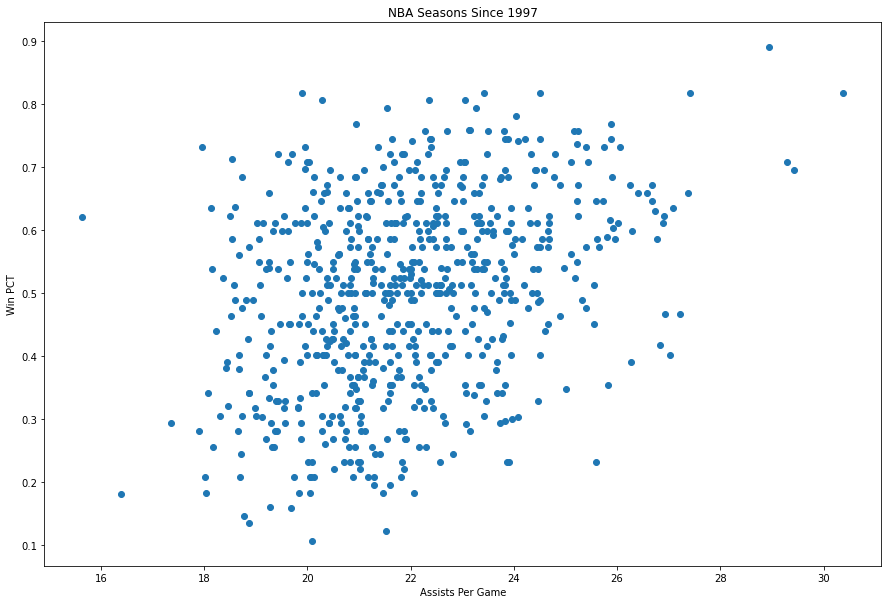

In [111]:
x = apg
y = win_pct
r = np.corrcoef(x, y)
print("correlation coefficient: " + str(r[0,1]))
fig, ax = plt.subplots()
#ax.fmt_ydata = millions
plt.xlabel("Assists Per Game")
plt.ylabel("Win PCT")
plt.plot(x, y, 'o')
plt.title("NBA Seasons Since 1997")
plt.show()

correlation coefficient: 0.2476591459542903


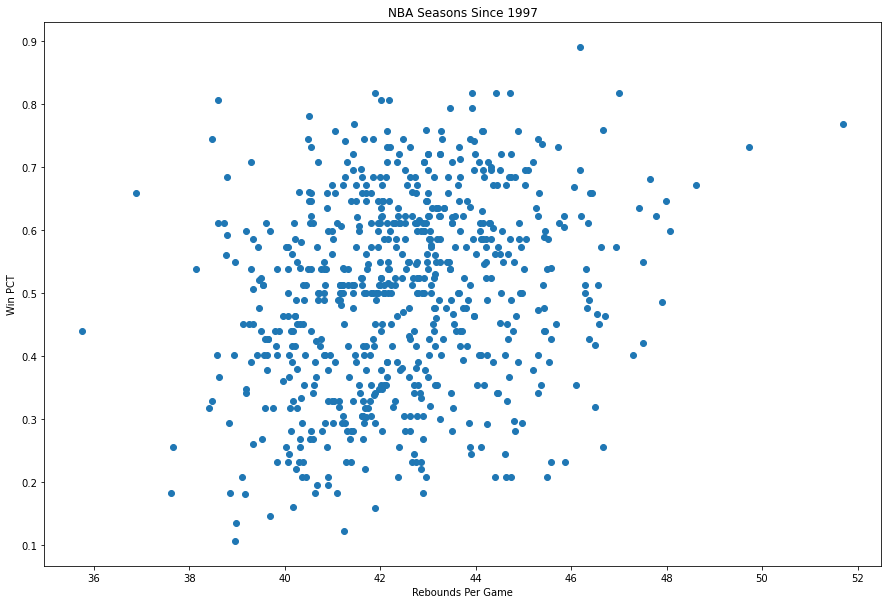

In [112]:
x = rpg
y = win_pct
r = np.corrcoef(x, y)
print("correlation coefficient: " + str(r[0,1]))
fig, ax = plt.subplots()
#ax.fmt_ydata = millions
plt.xlabel("Rebounds Per Game")
plt.ylabel("Win PCT")
plt.plot(x, y, 'o')
plt.title("NBA Seasons Since 1997")
plt.show()

correlation coefficient: 0.5849193423765807


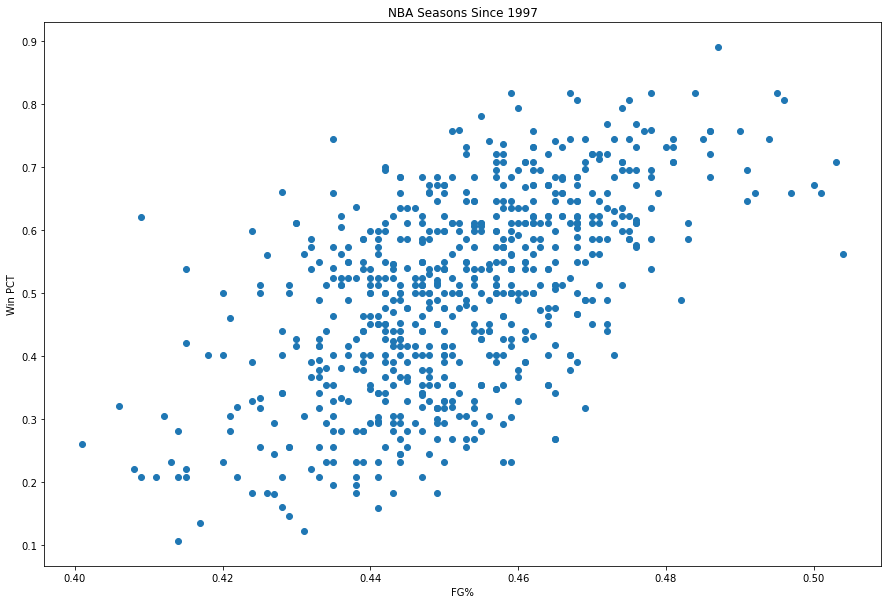

In [113]:
x = fgpct
y = win_pct
r = np.corrcoef(x, y)
print("correlation coefficient: " + str(r[0,1]))
fig, ax = plt.subplots()
#ax.fmt_ydata = millions
plt.xlabel("FG%")
plt.ylabel("Win PCT")
plt.plot(x, y, 'o')
plt.title("NBA Seasons Since 1997")
plt.show()

correlation coefficient: 0.4459859662399502


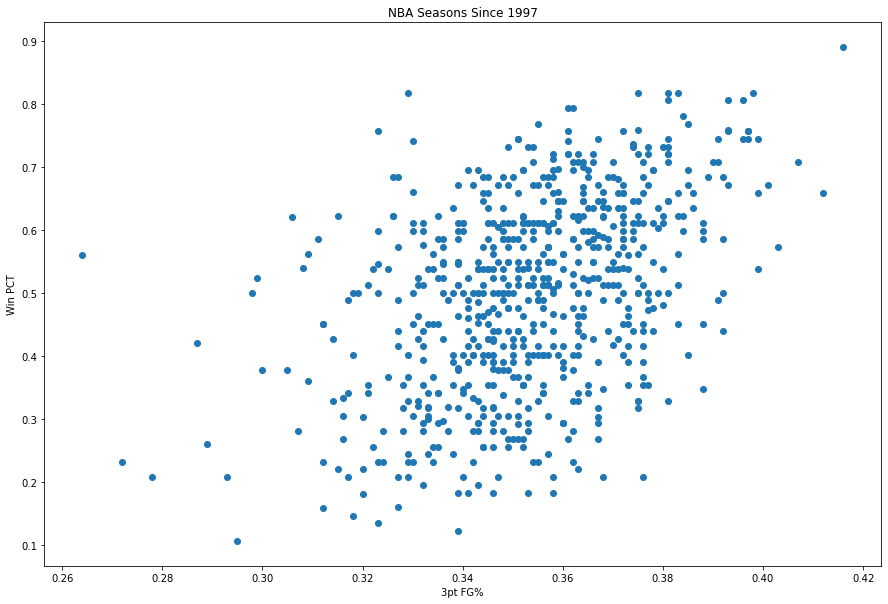

In [115]:
x = threepct
y = win_pct
r = np.corrcoef(x, y)
print("correlation coefficient: " + str(r[0,1]))
fig, ax = plt.subplots()
#ax.fmt_ydata = millions
plt.xlabel("3pt FG%")
plt.ylabel("Win PCT")
plt.plot(x, y, 'o')
plt.title("NBA Seasons Since 1997")
plt.show()